Choose the challenges in any order depending on your personal interests and skills. Solving one exercise will possibly need longer than one class !

## Challenge:  RNA translation

Write a script which translates a FASTA file containing RNA sequences to a FASTA file with corresponding amino 
acid sequences. 

Hint: 
- use http://siscourses.ethz.ch/python_dbiol/data/codon_table.txt to create a dictionary mapping codons to amino acids first. 
- then write a function which translates a RNA seq to an AA sequence.
- then use this function to solve the overall exercise.

## Challenge: Formula generator

Write a function which takes two mass values and prints all mass formulas consisting of zero or more `C`, `H` and / or `O`  where the mass is in the given range. The exact masses are: `mass_C = 12.0`, `mass_H = 1.0078250319` and `mass_O = 15.994915`.

So for example for the mass range `100.0` to `100.1` the formulas `C4H4O3`, `C5H8O2`, `C6H12O` and `C8H4` are printed.
    
Hint: you need three nested `for` loops for this to iterate over all combinations of numbers of C, H and O. The inner code block of those loops computes the mass of the current combination and checks if this fits into the prescribed range. To minimize the numbers of iterations needed you can estimate the upper bounds of the loops from the upper limit of the mass range.
    
If you solved this introduce some "pretty printing" so that a combination `8 C, 1 H, zero O` is displayed as `C8H`.

- Restrict your program to only look up carbohydrates having the general formula $C_m(H_2O)_n$. You can  either filter the results from the existing solution or implement a new version with two nested loops for `m` and `n`.

## Challenge: Column wise averages of a csv file

Learn about Python exceptions first: https://siscourses.ethz.ch/python_dbiol/11_exception_handling.html

Write a function which checks if a given string represents a valid floating point value using exception handling.

Now write a script which computes column wise averages of a given csv file. The rows are not required to have the same length, rows can be empty also. Ignore cells with invalid numbers. The size of the sheet is not known in advance. Use the file `data.csv` from the script repository for testing.

Hints:

- replace invalid cell entries by zero
- read all cells first, then fill up lines with zeros as needed

Extend your csv file such that the first column contains a random word as a group indicator followed by a random number of float numbers. 

Now compute the column wise sum grouped by the indicator from the first column. Use `data_grouped.csv` for testing.

The output should look like this:

    group0     23.79  -31.97  -14.10   21.74   41.21    7.83  -27.94   43.77  -43.09
    group1    -42.13  -23.73    0.00    0.00  -20.82  -33.25  -28.05   15.96    3.42
    group11    55.30   46.08  -29.53    0.00    0.00   -9.38
    group13    48.66  -12.12   26.33   26.20   46.43  -24.18  -26.00   38.97
    group14    49.90   13.55   38.16  -45.08   21.11   80.88   19.75    0.00   -4.31
    group15    47.08  -27.92    0.00  -17.81   26.05   10.37   45.38  -47.43   24.76
    group16    -6.95   22.93   16.48  -10.24   -7.89    2.36    0.00  -42.02  -41.60
    group18    37.89    9.22   -5.21   64.34 -117.40  -21.33   23.71  -26.46    9.93
    group19     8.70  -17.52  -20.38  -37.36  -52.66   13.72   46.30   23.23 

Hints:
- Use a dictionary which maps the group identifier to a list of rows (this a list of lists)
- For every group fill up the associated rows with zeros as needed

Lookup the `glob` Python module and extend your solution to iterate over all `csv` files in a given folder. Finally create one `csv` file where the first column is the name of the respective `csv` file followed by the column wise sums.

## Challenge "brownian motion"

### Quick intro into Python plotting

First make sure to install `matplotlib` and `numpy` if needed.

In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
x = np.linspace(0, 2* np.pi, 100)   # discretize 0 .. 2pi to 100 points
print(type(x))
print(x)

<class 'numpy.ndarray'>
[ 0.          0.06346652  0.12693304  0.19039955  0.25386607  0.31733259
  0.38079911  0.44426563  0.50773215  0.57119866  0.63466518  0.6981317
  0.76159822  0.82506474  0.88853126  0.95199777  1.01546429  1.07893081
  1.14239733  1.20586385  1.26933037  1.33279688  1.3962634   1.45972992
  1.52319644  1.58666296  1.65012947  1.71359599  1.77706251  1.84052903
  1.90399555  1.96746207  2.03092858  2.0943951   2.15786162  2.22132814
  2.28479466  2.34826118  2.41172769  2.47519421  2.53866073  2.60212725
  2.66559377  2.72906028  2.7925268   2.85599332  2.91945984  2.98292636
  3.04639288  3.10985939  3.17332591  3.23679243  3.30025895  3.36372547
  3.42719199  3.4906585   3.55412502  3.61759154  3.68105806  3.74452458
  3.8079911   3.87145761  3.93492413  3.99839065  4.06185717  4.12532369
  4.1887902   4.25225672  4.31572324  4.37918976  4.44265628  4.5061228
  4.56958931  4.63305583  4.69652235  4.75998887  4.82345539  4.88692191
  4.95038842  5.01385494  5.0

In [28]:
print(x.shape)

(100,)


In [29]:
# apply function on vector to create a new vector:
y1 = np.sin(x)

# apply functions on vectors to create a new vector
y2 = 0.5 * np.cos(x) + 0.5 * np.sin(2 * x)

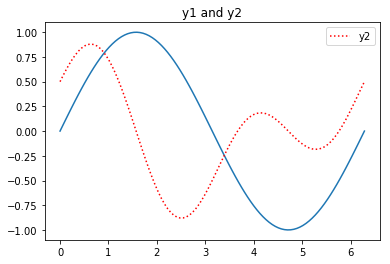

In [30]:
%matplotlib inline
pyplot.plot(x, y1)
pyplot.plot(x, y2, "r:", label="y2")  # red dots, try "r." and "yo" and "b*" also
pyplot.legend()  # shows label(s) in a box
pyplot.title("y1 and y2")
pyplot.savefig("y1_and_y2.png")
pyplot.show()

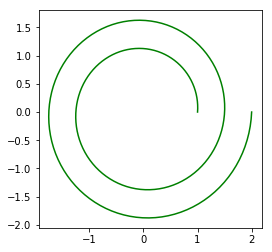

In [31]:
pyplot.figure(figsize=(4, 4))  # quadratic plot

# "time"
t = np.linspace(0, 4*np.pi, 200)

# radius changes over time
r = 1 + t / 4 / np.pi   

# formulas for points on a circle with radius r:
x = r * np.cos(t)
y = r * np.sin(t)

pyplot.plot(x, y, "g")  # green lines
pyplot.show()

## Exercise

A particle starts at position `(0, 0)`. Then it jumps randomly as follows:

- it draws a random angle $\phi$ from $0 \ldots 2\pi$ and a random step size $r$ from the range $0 \ldots 1$.
- it updates its position by doing a step of size $r$ in direction $\phi$.

Write a function which does `n` such iterations and creates two lists of `x` and `y` coordinates during these iterations.

Use `matplotlib` to plot 1000 of such iterations.

Use `matplitlib` to plot 10000 of such iterations, where every segment of 2000 iterations has a different color.

This is an example using the colors RGBKY in this order:

<img src="brownian.png">

## Challenge: Introduction to Numerical Computations

These exercises assume some familiarity with basic calculus. If this is not your cup of tea skip the challenge. The exercises try to give you an idea what "numerics" is about.

- First read how the bisection method works at https://en.wikipedia.org/wiki/Bisection_method#Iteration_tasks. Use this to find an approximation of $\sqrt{2}$ by looking for a zero of $f(x) = x^2 - 2$.

- Use the same function and https://en.wikipedia.org/wiki/Newton%27s_method (here $f'(x) = 2x$) to approximate $\sqrt{2}$. Print a table which shows the values for the first five iterations of both methods.

- First look at https://en.wikipedia.org/wiki/Monte_Carlo_method#/media/File:Pi_30K.gif. Now imagine you create a random point in the square. The probability that this point is also in the shown quadrant of the circle is the quotient of the areas of the two objects: $\pi/4$ for the quadrant of the circle and $1$ for the square. So if you create **many** such random points the fraction of "hits" should approxiamte $\pi/4$. Implement this to compute an approximation of $\pi$ and compute the relative error. (To check such a "hit" use the Pythagorean theorem).

- Use the first $n$ terms of https://en.wikipedia.org/wiki/Leibniz_formula_for_%CF%80 to compute an approximation of $\pi$

## Challenge: fit data to a given function

The following snippet shows how you can determine parameters of a given function to fit to given data:

In [ ]:
%matplotlib inline
import numpy as np
import scipy.optimize
import matplotlib.pyplot as pyplot

n_points = 10

x_data = np.arange(n_points)

# we generate artificial data by applying the function f(x) = -0.1 * x^2 + 2 * x + 1
exact_y_data = -.1 * x_data ** 2 + 2 * x_data + 1

# we add some noise with std dev 0.5:
measured_y_data = exact_y_data + 0.5 * np.random.randn(n_points)


def f(x, a, b, c):
    """
    argument x:  vector of values
    argument a:  first parameter to fit
    argument b:  second parameter to fit
    argument c:  third parameter to fit
    
    
    returns:  vector of y values corresponding to parameters a and b
    """
    return a * x * x + b * x + c


# we start with the assumption a = 0, b = 0 and c = 0: 
p_start = np.array([0, 0, 0])

parameters, cov_matrix = scipy.optimize.curve_fit(f, x_data, measured_y_data, p_start)
print(parameters)

pyplot.plot(x_data, exact_y_data, "b", label="exact")
pyplot.plot(x_data, measured_y_data, "b*", label="measured")
pyplot.plot(x_data, f(x_data, parameters[0], parameters[1], parameters[2]), "green", label="fitted")
pyplot.legend(loc=2)  # upper left corner
pyplot.show()

- Install numpy, scipy and matplotlib (if not done yet) and reproduce this example. Lookup documentation to understand it.

Logistic growth describes the evolution of a single population in an environment of limited capacity. See https://en.wikipedia.org/wiki/Logistic_function#In_ecology:_modeling_population_growth for details.


- Download https://siscourses.ethz.ch/python_dbiol/data/logistic_data.txt and fit the parameters $K$, $P_0$ and $r$ of the corresponding logistic function
 
   $$P(t) = \frac{K P_0 e^{rt}}{K + P_0 \left( e^{rt} - 1\right)}$$
  

- Also create the plots showing the data and the function according to the fitted parameters.

- https://siscourses.ethz.ch/python_dbiol/data/logistic_data_multi.txt contains multiple measurements in one single file. Read the data, merge values to $t$ and $P(t)$ vectors and run the fitting again.
 
- Try to automate the downloads using https://pymotw.com/3/urllib.request/index.html

## Challenge: Hangman game

Implement the Hangman-Game:

   - the computer knows a secret word
   - you have to guess letters from the word until the word is disclosed
   - after every wrong guess the computer informs you about the number of wrong guesses up to now, you loose after 10 wrong guesses
   - before you enter a guess the computer tells what you disclosed up to now by showing the secret word where a `*` is displayed for not yet guessed letters.
   
Below is a template to start. The bodies of the functions are empty, fill them up so that the final program works. The multi line strings you see serve as comments and describe how the functions should work.
   
**If you solved this here are two advanced but very good code katas !!!!**

First code kata: only keep the functions from you solutions and try to re-implement `play_game` without cheating.

Second code kata: implement the full solution.

In [ ]:
def print_guessed(word, user_inputs):
    """
    word:  a string holding the secret word
    use_inputs:  a list of letters, collecting the user inputs
    returns: None
    
    this function prints the word letter by letter showing
    unguessed letters as "*"
    
    So the function might show "P Y * * O N" if the word is "PYTHON" and
    the user_input is ["O", "N", "P", "X", "E", "Y"]
    """
    
    
def count_guessed(word, user_inputs):
    """
    word:  a string holding the secret word
    use_inputs:  a list of letters, collecting the user inputs
    
    returns: the number of letters in "word" appearing in "user_inputs".
    """
    
    
def ask_new_guess(user_inputs):
    """
    user_inputs: list of letters already input by user
    returns: new guess from user in upper case
    
    asks until the user provids a new guess, if he repeats a
    previous guess a message is displayed and the user is
    asked again. Same happens if user inputs empty string
    or more than one character
    """
    

def play_game(secret_word):
    user_inputs = []
    guesses_left = 5

    while True: 
        
        print_guessed(secret_word, user_inputs)

        guess = ask_new_guess(user_inputs)
        user_inputs.append(guess)
        
        if guess not in secret_word:
            guesses_left -= 1
            print("WRONG ! %d guesses left !!!" %  guesses_left)
            if guesses_left == 0:
                print("GAME OVER ! THE WORD IS", secret_word)
                break

        print()
        letters_guessed = count_guessed(secret_word, user_inputs)
        if letters_guessed == len(secret_word):
            print("YOU GOT IT !")
            break
            
import random
secret_words = ["notebook", "pythoncourse"]

secret_word = secret_words[random.randint(0, len(secret_words) - 1)].upper()

play_game(secret_word)

## Challenge: Phone number data base

Write a phone book application. If you start the program the user if asked if he wants to add an new name + phone number or if he wants to lookup an existing phone number. Store the data provided by the user in a csv file so if you restart the program the already entered data will not be lost. So the interaction with the program could look like this:

     PHONEBOOK v1.0
     ==============
        
     Already 3 entries in the phone book
     
     Please choose:
     
         1: add a new entry
         2: lookup a number
         3: show all entries
         0: exit
         
     Your choice: 1
     
     Ok, please enter a name: Julian
     And his phone number: +41 2342 2342
     
     PHONEBOOK v1.0
     ==============
     
     Already 4 entries in the phone book
     
     Please choose:
     
         1: add a new entry
         2: lookup a number
         3: show all entries
         0: exit
         
Write functions like 

    def main_menu(phone_book_entries):
    
    def submenu_add_entry(phone_book_entries): 
    
    def submenu_lookup_entry(phone_book_entries):
    
etc.

Discard invalid input.

Suggestions: Either you use a dictionary for lookup or lists. The second approach would allow you to make a lookup which ignores special characters like spaces or `.` in a name and would ignore the case of the letters.

If you start and the phone book is empty you can use `import os` and then `os.path.exists(..)` (use google for futher details) to check if there is already an phone book file or not.

## Challenge: Tic Tac Toe

The idea is that two users can place `X` and `O` in alternating order by providing coordinates like `A2` (for the first row and second column).

A user is not allowed to overwrite a taken field and the computer should detect if `X` or `O` wins.

You can represent a 3 times 3 board by nested list like `board = [[" ", " ", " "], [" ", " ", " "], [" ", " ", " "]]` for the empty board at the beginning.

To get started:
- Write a function which asks the user to place a `X` or `O` to given coordinates until he chooses a free field. So this could be `def place(symbol, board):` which then returns the updated board.
- Write a function which prints the board nicely as `def print_board(board):`.
- Write a function which checks if a given field is free. `def is_empty(coordinates, board):`. 
- Write a function which checks if a given board represents a winning state like `def check_winner(board)` which returns `X` or `O` or `None`.

For `check_winner` you could for example check if you find a row where all values are the same, than the first value of this row would be the result. Same for columns and the two diagonals.

## Challenge: Fetch CHF exchange rates from a web service

The following snippet demonstrates how to fetch exchange rate EUR to X for a given date using a so called "web service".

In [1]:
import json
import urllib.request

url = "http://api.fixer.io/2014-01-03"
response_bytes = urllib.request.urlopen(url).read()
print(response_bytes)

b'{"base":"EUR","date":"2014-01-03","rates":{"AUD":1.5156,"BGN":1.9558,"BRL":3.2373,"CAD":1.4468,"CHF":1.2309,"CNY":8.2569,"CZK":27.525,"DKK":7.4586,"GBP":0.83045,"HKD":10.573,"HRK":7.628,"HUF":298.66,"IDR":16533.0,"ILS":4.7749,"INR":84.802,"JPY":142.46,"KRW":1438.7,"LTL":3.4528,"MXN":17.821,"MYR":4.476,"NOK":8.3585,"NZD":1.6434,"PHP":60.892,"PLN":4.1658,"RON":4.4879,"RUB":45.139,"SEK":8.8561,"SGD":1.7244,"THB":45.022,"TRY":2.9637,"USD":1.3634,"ZAR":14.439}}'


So the web service returns a (so called) "byte string" which looks like a dictionary (the format is called JSON). To get a "real" dictionary we can use:

In [2]:
%%capture
import pprint
data_as_dict = json.loads(str(response_bytes, "ascii"))
pprint.pprint(data_as_dict)  # nicer output than a plain print()

Take the code as it is, communicating to web services is a topic on its own. Another example for a webservice is PUG to query data from Pubchem: https://pubchem.ncbi.nlm.nih.gov/pug_rest/PUG_REST_Tutorial.html

- Start with this snippet to write a function which determines the CHF to EUR exchange rate for a given year, month and day. 
- Then create a plot for the EUR to CHF exchange for the first of every month starting with 1st of january 2015 until today.
- Write a function which determines the average exchange rate for a given month. (You remember the leap year computation exercise ?)
- Create a plot for the monthly averages.

## Challenge: A simple sorting algorithm

Implement selection sort to sort a list of numbers. This is the strategy of this algorithm:

* Start with index 0 and find the position of a minimal value in the list starting with index 0. Swap the values at both positions.
* Go on with index 1 and find the position of a minimal value in the list starting with index 1. Swap the values at both positions.
* Go on with index 2 and find the position of a minimal value in the list starting with index 2. ...
* .. and so on
        
So for a list `[2, 5, 1, 4, 3]` the result of step 0 is `[1, 5, 2, 4, 3]`, the result of step 1 is `[1, 2, 5, 4, 3]`, then `[1, 2, 3, 4, 5]`.
    
1. Reproduce and exercise this procedure with pen and paper. 
2. Start with a function `min_position(li, start_at)` which computes the position of the minimal value staring at the given position `start_at`. 
3. Then implement a funcion `step(i, li)` which perfoms step `i` for the given list (look up the position with `min_position(i + 1, li)`  then swap values at `i` and the computed position)
4. Write a loop which performs `step(0, li)` up to `step(len(li) - 1, li)`
5. Test your program for many inputs including empty lists and lists with only one element.

## Challenge: Decrypt a substitution cipher

Download the encrypted file https://siscourses.ethz.ch/python_dbiol/data/encoded.txt. The text was encoded by a "simple substitution cipher" as described at https://en.wikipedia.org/wiki/Substitution_cipher#Simple_substitution. The cipher kept space characters as space characters.

To break the cipher we make use of the fact that letters occur with different frequencies in texts. This distribution depends on the actual language.

We assume that the letters in English texts ordered by their frequency are `etaonhisrldwugfycbmkpvjqxz`. So `e` is the most common character, `t` the second common character and so on. (This ordering is not fixed but depends on the text corpus used, so you will find slightly modified version on the Internet).

So if a simple substitution cipher maps `e` to `a` we should see that `a` occurs most often in the encrypted text (given that the original text was in English and that the encrypted text is long enough).

To decode the text:

 - first order the letters from the encoded text by their frequency
 - then construct a dictionary to map the characters from the given text to their most probable counterpart 
 - and finally use this to decode the text. 

The decoding will not be perfect but you should recognize English words and might refine the constructed dictionary manually to improve the result.

## Introduction pandas 

The `pandas` library support handling of tabular data. In contrast to a `numpy` matrix every column can have a different type. 


pandas allows reading different file formats from different sources:

In [3]:
import pandas as pd

dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, delimiter=";")
print("shape (rows, cols) is", data.shape)
print("column names are", data.columns)
print(data.head())  # only a few first lines
print(data.tail())  # only a few last lines

shape (rows, cols) is (1599, 12)
column names are Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0           

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [84]:
example = data.head()
print(example.shape)
print(example)

(5, 12)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8  

In [85]:
example[["pH", "quality"]]

,pH,quality
0,3.51,5
1,3.20,5
2,3.26,5
3,3.16,6
4,3.51,5


In [86]:
very_good_wines = data[data["quality"] >= 7]
print(very_good_wines.shape)
very_good_wines.head()

(217, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.9968,3.38,0.62,9.5,7


In [58]:
print(very_good_wines["alcohol"].min())
print(very_good_wines["alcohol"].mean())
print(very_good_wines["alcohol"].max())

9.2
11.5180491551
14.0


In [88]:
groupwise_min_values = data[["quality", "alcohol"]].groupby(["quality"]).min()

groupwise_min_values

very_good_wines.to_csv("good_wines.xlsx")

# Challenge: quick intro into machine learning with scikit-learn

Preparation: install "pandas" and "scikit-learn".


We can separate learning problems in a few large categories:

- **supervised learning**, in which the data comes with additional attributes that we want to predict. This problem can be either:

   - **classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. 
   - **regression**: if the desired output consists of one or more continuous variables, then the task is called regression. 
   
   An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

- **unsupervised learning** in which the training data consists of a set of input vectors x without any corresponding target values. 

Examples:

- classification: Spam filter, handwritten digit recognition
- regression: predict the length of a salmon as a function of age and weight
- unsupervised learning: PCA, clustering

For the most cases the learning data is aranged as a *feature matrix*. Per learning example we use one row, and the data in every row is called a *feature vector*, the columns of the matrix are the *features*. For supervised learning we also need a vector of labels which has as much entries as the feature matrix rows.

Example:


In [3]:
import pandas as pd
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, delimiter=";")
data["good_quality"] = data["quality"] >= 6

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


Here the columns up to "quality" are the features, and the last column is our label vector.

For getting started we start with 2-dimensional feature vectors which makes plotting easier.

For this we create random points with x and y coordinates in [-1.5, 1.5] and points where both coordinates have the same sign are labeled as "True" and others as "False":

feature matrix shape for learning  : (133, 2)
feature matrix shape for evaluation: (67, 2)

first 10 feature vectors + labels:
[ 0.60330361  1.1371488 ] True
[-1.33078797 -0.28353364] True
[ 0.37217748 -1.29483082] False
[ 0.14559219  0.62857116] True
[ 0.37752144 -0.12904102] False
[ 0.14514231 -0.84177145] False
[-0.3029923   0.14351204] False
[-1.47032512 -1.07923806] True
[ 0.81342354 -0.04377843] False
[-0.0640219   1.07251983] False

red dots are features from class 'False', green dots are from class 'True':


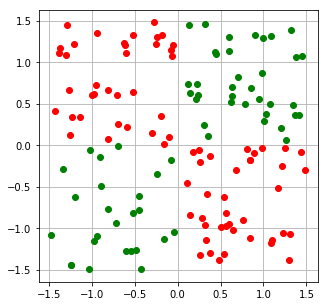

In [22]:
%matplotlib inline

import random
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection import train_test_split

# 300 features of 2d coordinates in range -1.5 to 1.5
points = np.random.random((200, 2)) * 3 - 1.5
labels = (points[:, 0] * points[:, 1]) > 0

# we split our data: 2/3 are used for learning the classifier, the other 1/3 is used
# later for an unbiased validation of the classifier:
points_learn, points_eval, labels_learn, labels_eval = train_test_split(points, labels, test_size=0.333)

print("feature matrix shape for learning  :", points_learn.shape)
print("feature matrix shape for evaluation:",points_eval.shape)

print()
print("first 10 feature vectors + labels:")
for (p, l) in zip(points_learn[:10], labels_learn[:10]):
    print(p, l)

print()
print("red dots are features from class 'False', green dots are from class 'True':")

def plot_examples(points, labels):
    for (p, l) in zip(points, labels):
        x, y = p
        if l:
            pyplot.plot(x, y, "go")
        else:
            pyplot.plot(x, y, "ro")
    pyplot.grid()

pyplot.figure(figsize=(5, 5))
plot_examples(points_learn, labels_learn)
pyplot.show()

Now we train a so called "support vector machine" to distinguish both classes:

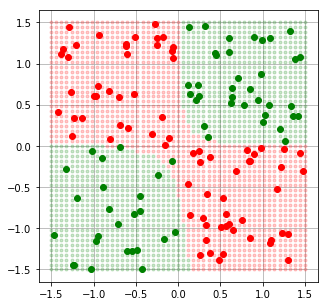

In [23]:
from sklearn import svm
from sklearn.utils.extmath import cartesian

# we choose a SVM which is often a good algorithm to get started:
learner = svm.SVC(kernel="rbf", C=100)

# we learn from our features and labels:
learner.fit(points_learn, labels_learn)

# we plot for a all points in a regular grid its class color
# so we undestand better what the "decision surface" looks like:
pyplot.figure(figsize=(5, 5))

def plot_data(grid_2d, labels):
    xs = grid[:, 0]
    ys = grid[:, 1]

    pyplot.plot(xs[labels == 0], ys[labels == 0], "r.", alpha=.2)
    pyplot.plot(xs[labels == 1], ys[labels == 1], "g.", alpha=.2)

x_grid = np.linspace(-1.5, 1.5, 51)
y_grid = np.linspace(-1.5, 1.5, 51)
grid = cartesian((x_grid, y_grid))
pred_labels = learner.predict(grid)

plot_data(grid, pred_labels)

# and we overlay this plot with our training data:
plot_examples(points_learn, labels_learn)

Exercise:

- repeat the code examples
- try other values for the "C" parameter (eg 1, 0.1 and 1000)
- try other classifiers from the scikit learn website, eg "random forests" and "linear svm" or other kernels than "rbf".

To evaluate our classifier we use the `points_eval` and `labels_eval` data.

**NEVER EVALUATE A CLASSIFIER WITH TRAINING DATA, ALWAYS KEEP A PART OF YOUR DATA AS EVALUATION DATA**

**NEVER EVALUATE A CLASSIFIER WITH TRAINING DATA, ALWAYS KEEP A PART OF YOUR DATA AS EVALUATION DATA**

**NEVER EVALUATE A CLASSIFIER WITH TRAINING DATA, ALWAYS KEEP A PART OF YOUR DATA AS EVALUATION DATA**

````
TP = True positives (classified as positive, and indeed "positive")
TN = True negatives
FP = False positives (classified as positives, but "negative" in reality)
FN = False negatives

precision: fraction of positive examples among all positive classifications (TP / (TP + FP))
recall   : fraction of positive classified features among all positive features (TP / (TP + FN))

F1       : weighted combination of precision + recall
````

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

labels_predicted = learner.predict(points_eval)

M = confusion_matrix(labels_eval, labels_predicted)
TN, FN = M[0, :]
FP, TP = M[1, :]

print("True negatives :", TN)
print("True positives :", TP)
print("False negatives:", FN)
print("False positives:", FP)
print()

print(classification_report(labels_eval, labels_predicted))

True negatives : 25
True positives : 37
False negatives: 1
False positives: 4

             precision    recall  f1-score   support

      False       0.86      0.96      0.91        26
       True       0.97      0.90      0.94        41

avg / total       0.93      0.93      0.93        67



In [17]:
import pandas as pd
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, delimiter=";")
data["good_quality"] = data["quality"] >= 6

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
features = data.iloc[:, :11]
features -= features.mean()
features /= features.std()

labels = data.iloc[:, 12]
feat_learn, feat_eval, labels_learn, labels_eval = train_test_split(features, labels, test_size=0.333)

learner = RandomForestClassifier()
learner.fit(feat_learn, labels_learn)

labels_predicted = learner.predict(feat_eval)

M = confusion_matrix(labels_eval, labels_predicted)
TN, FN = M[0, :]
FP, TP = M[1, :]


print("True negatives :", TN)
print("True positives :", TP)
print("False negatives:", FN)
print("False positives:", FP)
print()

print(classification_report(labels_eval, labels_predicted))


True negatives : 201
True positives : 210
False negatives: 53
False positives: 69

             precision    recall  f1-score   support

      False       0.74      0.79      0.77       254
       True       0.80      0.75      0.77       279

avg / total       0.77      0.77      0.77       533



# Recursion

We talk about recursion if a function calls itself.

First an example without recursion:

In [22]:
def product(n):
    result = 1
    for i in range(1, n +1):
        result *= i
    return result

print(product(5))

120


This function fulfills the equation `product(n) = n * product(n - 1), product(1) = 1`. This is a so called "recursive definition".

In [23]:
def product_2(n):
    if n == 1: 
        return 1
    result = product_2(n - 1) * n
    return result

print(product_2(5))

120


To trace this  for `product_2(3)`:

- `result` in `product_2(3)` is `result = product_2(2) * 3`.
- this calls now `product_2(2)`:
- `result` in `product_2(2)` is `result = product_2(1) * 2`.
- this calls now `product_2(1)`:
- which returns `1`.
- now `product_2(2)` continues and returns `result = 1 * 2`
- now `product_2(3)` continues and returns `result = 2 * 3` which is `6`

I hope you recognize how important the extra handling for `n == 1` is, because it breaks the repeated function calls and passes execution back to the caller.

Without such a final case the program would run forever with increasing negative values for `n`.

## Exercise
- try to understand the explanations
- write a recursive function for summing up the numbers `1`... `n` for a given `n`.
- write a recursive functino for summing up numbers in a given list.

## Advanced recursion: Quicksort

One of the fastest sorting algorithms is called "quicksort". The idea is as follows:

1. I have a list of numbers, say `[3, 4, 2, 7, 1, 6]`.
2. I choose the first element `3` as a so called *pivot element*.
3 I split the given list in numbers smaller the pivot element and numbers larger or equal the pivot element. So I get lists `[2, 1]` and `[4, 7, 6`]. The pivot element is not in both lists.
4. I take now an arbitrary sorting algorithm to sort both lists individually which gives me `[1, 2]` and `[4, 6, 7`].
5. I place the pivot in the middle and join lists and pivot, so I get the sorted list `[1, 2, 3, 4, 6, 7]`.

### Exercise

- repeat the algorithm for some random numerical lists.

The trick now is to use quicksort again in step 4 which makes this procedure recursive:

Pseudo code is:
````
    quicksort([]) = [] 
    quicksort(li) for len(li) > 0:
        pivot = li[0]
        li1 = elements in li < pivot
        li2 = elements in li >= pivot except the pivot element
        return quicksort(li1) + [pivot] + quicksort(li2)
````

- Now try to implement this using list comprehensions
- Benchmark your runtime for random number lists of increasing size and plot a diagram list size vs runtime. (You might use the `time` function in the `time` module for measuring execution time`.
- Compare this with the runtime of the selection sort algorithm we implemented above.

In [21]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR FORMATTING THE INSTRUCTIONS ABOVE !
from IPython import utils, paths
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    # base = utils.path.get_ipython_dir()
    base = paths.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
      
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #ffe7e7;
         padding: 1pt;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-heigt: 145%;
    }

    div.output_area pre {
        background: #fffdf0;
        padding: 3pt;
    }
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND